In [171]:
import vaex
from glob import glob
from os.path import join, abspath
from os import pardir
import numpy as np
from matplotlib import pyplot as plt
import sys
from datetime import datetime
from time import time
import pandas as pd

In [2]:
current = abspath('')
# import utils
root_dir = abspath(join(current, pardir))
if not root_dir in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/2_Cleaning',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [3]:
from utils import safe_mkdir

In [4]:
# root data directory
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [5]:
# Combine gaia with others
name = "Combine"
data_dir = join(root_data_dir, name)
safe_mkdir(data_dir)

Directory /home2/s20321005/Thesis-Project/Data/Combine already exist. Good to go!


In [6]:
# load Gaia-2MASS
name = "Gaia-2MASS-old"
gaia_dir = join(root_data_dir, name)
gaia_files = glob(join(gaia_dir, "*.hdf5"))
gaia_files.sort()
gaia_files[:5]

['/home2/s20321005/Thesis-Project/Data/Gaia-2MASS-old/gaia-000-001.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Gaia-2MASS-old/gaia-001-002.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Gaia-2MASS-old/gaia-002-003.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Gaia-2MASS-old/gaia-003-004.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Gaia-2MASS-old/gaia-004-005.hdf5']

In [45]:
gaia = vaex.open_many(gaia_files)
gaia

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,rv_gaia,e_rv_gaia,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs
0,0.035724,-89.033127,15.052,14.149,UCU,999999,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--
1,0.063679,-89.064964,16.05,14.818,ABB,4611985154309689728,22.728117,18.444002843809276,0.2338192,13.281042088032434,0.17243546,1.9008664677626548,0.14516754,18.659096,19.952793,17.509138,14.816096,92.14082,0.961987,1.434219,nan,nan,303.16646276195394,-28.03992520733377,3567.7712,3540.4517,3591.2698,4.8081,4.7134,4.8715,-0.5701,-0.7321,-0.4132,511.7533,482.8406,543.6623,0.5659,0.532,0.5969,nan,nan,nan,nan,nan,nan,nan,nan,nan,
2,0.065677,-89.440903,16.832,15.721,CCD,4611773979359229696,12.257193,10.270257194694619,0.5276517,-6.690335307418338,0.73907304,1.6194768785625475,0.46543595,20.19899,21.46941,18.940907,5.781402,32.732517,1.0632449,1.5661117,nan,nan,303.07168987844585,-27.673373331486737,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,
3,0.067073,-89.130386,15.453,14.788,AAB,4611972995259913856,6.025634,6.025590956511702,0.08982857,-0.022785710268113032,0.08030422,0.4389235852794528,0.065967396,17.134779,17.24778,16.258772,32.04953,42.694496,1.1276225,1.5967586,nan,nan,303.15001941439283,-27.976158120916963,5370.4893,5230.6763,5469.612,4.6165,4.5889,4.6439,-4.09,-4.1346,-3.9684,1469.2878,1397.0767,1547.8292,0.2059,0.114,0.2668,nan,nan,nan,nan,nan,nan,nan,nan,nan,unknown
4,0.073027,-89.090446,16.496,15.626,BCD,4611973334559675520,25.610413,16.575461579958816,0.34182423,19.52299381259894,0.28071013,1.592105289450467,0.2394431,19.371336,20.924316,18.204302,11.63563,72.14884,1.0419273,1.4066671,nan,nan,303.15991607268876,-28.01514667876553,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"470,994,547",359.810097,89.324234,14.997,14.232,AAA,2305750276576372992,8.857864,6.944159435779551,0.11212577,5.499127944254394,0.10824461,1.205446625880747,0.094102494,17.168484,18.000036,16.238264,72.4173,245.3936,1.5241516,1.3286858,nan,nan,122.76153347754278,26.469842071615023,4298.786,4278.832,4319.986,4.5658,4.5311,4.5965,-0.2744,-0.3633,-0.2046,770.3177,733.2712,814.6207,0.631,0.6054,0.6582,nan,nan,nan,nan,nan,nan,nan,nan,nan,K
"470,994,548",359.823644,89.644913,16.03,15.244,ACC,2305819541512528000,3.4697785,-3.342122996741894,0.119936794,0.9325107043887829,0.117376596,0.4851752777039695,0.10464805,17.959993,18.600903,17.200064,60.444508,90.97874,1.2257977,1.2494738,nan,nan,122.84219430111504,26.782347051064967,4269.341,4247.4688,4306.5337,4.8617,4.8323,4.8833,-1.2823,-1.3655,-1.1797,900.6884,867.4188,955.5297,0.0374,0.0109,0.0773,nan,nan,nan,nan,nan,nan,nan,nan,nan,
"470,994,549",359.843856,89.67437,15.542,14.9,ABB,2305819889406320896,9.0640955,-7.454146195987413,0.071599096,5.15689180333323,0.07226797,0.6795685788179534,0.061488032,17.302055,17.939072,16.520681,82.97307,178.90265,1.0247828,1.2678266,nan,nan,122.84974923386562,26.81102679181763,4885.6157,4807.968,5140.507,4.706,4.6177,4.7477,-0.8927,-1.0705,-0.488,990.8027,918.4789,1238.6727,0.5979,0.5382,0.7565,nan,nan,nan,nan,nan,nan,nan,nan,nan,F
"470,994,550",359.851795,89.1772,12.139,

In [ ]:
# gaia = (gaia_.filter("parallax > 0")
#                     .filter("e_parallax/parallax < 0.15")
#                     .filter("bpmag - rpmag > -3")
#                     .filter("bpmag - rpmag < 6")
#                     .filter("gmag > 3")
#                     .filter("gmag < 21")
#                     .filter("fb_over_err > 10")
#                     .filter("fr_over_err > 10")
#                     .filter("ruwe < 1.4")
#                     .filter("1.0+0.015*(bpmag - rpmag)**2 < excess_factor")
#                     .filter("1.3+0.06*(bpmag - rpmag)**2 > excess_factor")
#                     .filter("Jmag < 13.5")
#                     .filter("Jmag > 0")
#                )
# gaia

# RAVE6

In [139]:
# load RAVE
name = "RAVE6"
rave_dir = join(root_data_dir, name)
rave = vaex.open(join(rave_dir, "rave6.hdf5"))
rave

#,rv_rave,e_rv_rave,teff_rave,logg_rave,mh_rave,alphafe_rave,source_id
0,-37.893,4.791,3953.0,2.41,0.11,0.13,4973212867641442560
1,4.044,6.539,8286.0,4.91,0.39,0.0,4973250147957768832
2,-2.564,6.833,3813.0,2.89,0.38,0.38,4976544490953365632
3,77.837,1.993,4962.0,3.24,-0.61,0.07,4976851014178872448
4,3.519,4.035,4171.0,2.61,-0.14,0.19,4972468120311892096
...,...,...,...,...,...,...,...
"450,973",-0.753,1.277,5908.0,4.32,-0.01,0.11,6523116137833329792
"450,974",-1.839,2.183,5726.0,3.84,0.01,0.18,6523133145903856768
"450,975",7.603,1.202,3927.0,4.07,-0.41,0.0,6524623911873631104
"450,976",25.576,1.922,5654.0,4.33,0.05,0.19,6522142314129013504


In [140]:
a = rave.to_pandas_df()
a = a.drop_duplicates(subset=["source_id"])
rave = vaex.from_pandas(a)
rave

#,rv_rave,e_rv_rave,teff_rave,logg_rave,mh_rave,alphafe_rave,source_id
0,-37.893,4.791,3953.0,2.41,0.11,0.13,4973212867641442560
1,4.044,6.539,8286.0,4.91,0.39,0.0,4973250147957768832
2,-2.564,6.833,3813.0,2.89,0.38,0.38,4976544490953365632
3,77.837,1.993,4962.0,3.24,-0.61,0.07,4976851014178872448
4,3.519,4.035,4171.0,2.61,-0.14,0.19,4972468120311892096
...,...,...,...,...,...,...,...
"450,973",-0.753,1.277,5908.0,4.32,-0.01,0.11,6523116137833329792
"450,974",-1.839,2.183,5726.0,3.84,0.01,0.18,6523133145903856768
"450,975",7.603,1.202,3927.0,4.07,-0.41,0.0,6524623911873631104
"450,976",25.576,1.922,5654.0,4.33,0.05,0.19,6522142314129013504


# GALAH

join with rave to rave_galah

In [160]:
name = "GALAH"
galah_dir = join(root_data_dir, name)
galah_files = glob(join(galah_dir, "*.hdf5"))
galah_files.sort()
galah = vaex.open_many(galah_files)
galah

#,source_id,teff_galah,e_teff_galah,logg_galah,e_logg_galah,feh_galah,e_feh_galah,alphafe_galah,e_alphafe_galah,rv_galah,e_rv_galah
0,4667368899326730240,4553.3545,137.06088556228917,4.7149534,0.20121636742743593,-0.33501863,0.12021913955493135,0.35136763119226394,0.07919326531297675,36.20399856567383,0.18299999833106995
1,4667362989451832320,3622.7446,104.98349008795871,4.6915054,0.19856208380453938,nan,nan,nan,nan,55.373325571289065,0.7317890322419305
2,4667324643983679488,4852.4756,172.75096900138723,2.4668846,0.22319904274460833,-1.1701574,0.18190171456363485,0.27304791329884204,0.0853664789169457,95.87799835205078,0.1509999930858612
3,4667335913977929728,5588.5005,104.29455501889545,3.9993572,0.18612670726590325,0.052394867,0.09937209372391331,-0.015429693609670742,0.05371322433644004,7.130000114440918,0.12600000202655792
4,4667323681911007232,5709.503,109.2033998665521,4.1819053,0.18470374660212685,-0.013732433,0.11137627470861318,0.08102261072159844,0.0803723809132596,24.81599998474121,0.16300000250339508
...,...,...,...,...,...,...,...,...,...,...,...
"588,056",6003344796319529984,4531.2153,71.12315268169422,2.4103317,0.18300246561395928,-0.29380798,0.04297140239160699,0.157507937659917,0.01185075698787861,58.42599868774414,0.05700000002980232
"588,057",6000435312445129728,6059.4995,89.92103435161873,3.5193155,0.1905389116378251,-0.04507351,0.09163415120321836,0.003646820192376051,0.04083085258215475,0.2770000100135803,0.10999999940395355
"588,058",6000421607212226560,4132.9727,83.45848117487678,0.95939153,0.3021431599031527,-1.003942,0.06525723837358276,0.1258948343706562,0.028202345502403702,37.00600051879883,0.06700000166893005
"588,059",6000420675196587008,4776.9272,98.42247509802459,2.4207969,0.22091855410307684,0.007314205,0.07383443001503355,-0.022905150506586088,0.0371291787455343,-69.5719985961914,0.0560000017285347


In [162]:
a = galah.to_pandas_df()
a = a.drop_duplicates(subset=["source_id"])
galah = vaex.from_pandas(a)
galah["source_id"] = galah["source_id"].astype("int64")
galah

#,source_id,teff_galah,e_teff_galah,logg_galah,e_logg_galah,feh_galah,e_feh_galah,alphafe_galah,e_alphafe_galah,rv_galah,e_rv_galah
0,4667368899326730240,4553.3545,137.06088556228917,4.7149534,0.20121636742743593,-0.33501863,0.12021913955493135,0.35136763119226394,0.07919326531297675,36.20399856567383,0.18299999833106995
1,4667362989451832320,3622.7446,104.98349008795871,4.6915054,0.19856208380453938,nan,nan,nan,nan,55.373325571289065,0.7317890322419305
2,4667324643983679488,4852.4756,172.75096900138723,2.4668846,0.22319904274460833,-1.1701574,0.18190171456363485,0.27304791329884204,0.0853664789169457,95.87799835205078,0.1509999930858612
3,4667335913977929728,5588.5005,104.29455501889545,3.9993572,0.18612670726590325,0.052394867,0.09937209372391331,-0.015429693609670742,0.05371322433644004,7.130000114440918,0.12600000202655792
4,4667323681911007232,5709.503,109.2033998665521,4.1819053,0.18470374660212685,-0.013732433,0.11137627470861318,0.08102261072159844,0.0803723809132596,24.81599998474121,0.16300000250339508
...,...,...,...,...,...,...,...,...,...,...,...
"588,056",6003344796319529984,4531.2153,71.12315268169422,2.4103317,0.18300246561395928,-0.29380798,0.04297140239160699,0.157507937659917,0.01185075698787861,58.42599868774414,0.05700000002980232
"588,057",6000435312445129728,6059.4995,89.92103435161873,3.5193155,0.1905389116378251,-0.04507351,0.09163415120321836,0.003646820192376051,0.04083085258215475,0.2770000100135803,0.10999999940395355
"588,058",6000421607212226560,4132.9727,83.45848117487678,0.95939153,0.3021431599031527,-1.003942,0.06525723837358276,0.1258948343706562,0.028202345502403702,37.00600051879883,0.06700000166893005
"588,059",6000420675196587008,4776.9272,98.42247509802459,2.4207969,0.22091855410307684,0.007314205,0.07383443001503355,-0.022905150506586088,0.0371291787455343,-69.5719985961914,0.0560000017285347


In [170]:
rave_pandas = rave.to_pandas_df()
galah_pandas = galah.to_pandas_df()
# galah
rave_galah = pd.merge(rave_pandas, galah_pandas, on="source_id", how="outer")
rave_galah = rave_pandas.merge(galah_pandas, on="source_id", how="outer")
rave_galah = vaex.from_pandas(rave_galah)
# rave_galah.sort("source_id")
rave_galah

#,rv_rave,e_rv_rave,teff_rave,logg_rave,mh_rave,alphafe_rave,source_id,teff_galah,e_teff_galah,logg_galah,e_logg_galah,feh_galah,e_feh_galah,alphafe_galah,e_alphafe_galah,rv_galah,e_rv_galah
0,-37.893,4.791,3953.0,2.41,0.11,0.13,4973212867641442560,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,4.044,6.539,8286.0,4.91,0.39,0.0,4973250147957768832,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,-2.564,6.833,3813.0,2.89,0.38,0.38,4976544490953365632,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,77.837,1.993,4962.0,3.24,-0.61,0.07,4976851014178872448,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,3.519,4.035,4171.0,2.61,-0.14,0.19,4972468120311892096,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"1,034,208",nan,nan,nan,nan,nan,nan,6003344796319529984,4531.2153,71.12315268169422,2.4103317,0.18300246561395928,-0.29380798,0.04297140239160699,0.157507937659917,0.01185075698787861,58.42599868774414,0.05700000002980232
"1,034,209",nan,nan,nan,nan,nan,nan,6000435312445129728,6059.4995,89.92103435161873,3.5193155,0.1905389116378251,-0.04507351,0.09163415120321836,0.003646820192376051,0.04083085258215475,0.2770000100135803,0.10999999940395355
"1,034,210",nan,nan,nan,nan,nan,nan,6000421607212226560,4132.9727,83.45848117487678,0.95939153,0.3021431599031527,-1.003942,0.06525723837358276,0.1258948343706562,0.028202345502403702,37.00600051879883,0.06700000166893005
"1,034,211",nan,nan,nan,nan,nan,nan,6000420675196587008,4776.9272,98.42247509802459,2.4207969,0.22091855410307684,0.007314205,0.07383443001503355,-0.022905150506586088,0.0371291787455343,-69.5719985961914,0.0560000017285347


In [172]:
len(rave_galah['source_id'].unique()), len(rave_galah)

(1034213, 1034213)

In [173]:
mask = ~rave_galah["rv_galah"].isna() & ~rave_galah["rv_rave"].isna()
mask.sum()

array(4738)

In [174]:
rave_galah.export(join(data_dir, "rave_galah.hdf5"), progress=True)

export(hdf5) [########################################] 100.00% elapsed time  :     0.23s =  0.0m =  0.0h
 

# Lamost

prereq: galah and rave

In [175]:
name = "LAMOST"
lamost_dir = join(root_data_dir, name)
lamost_files = glob(join(lamost_dir, "*.hdf5"))
lamost_files.sort()
lamost = vaex.open_many(lamost_files)
lamost

#,subclass_lamost,teff_lamost,e_teff_lamost,logg_lamost,e_logg_lamost,feh_lamost,e_feh_lamost,rv_lamost,e_rv_lamost,alpham_lamost,e_alpham_lamost,source_id
0,F9,5580.10009765625,110.20999908447266,4.593999862670898,0.1770000010728836,-0.01899999938905239,0.11599999666213989,26.200000762939453,9.449999809265137,0.1918340027332306,0.04679799824953079,2676865000324707584
1,G0,5719.72021484375,90.4000015258789,3.9660000801086426,0.14100000262260437,-0.23499999940395355,0.09399999678134918,1.7300000190734863,8.5600004196167,0.15432800352573395,0.050794001668691635,2676120459154270336
2,F6,5931.68994140625,95.66000366210938,4.370999813079834,0.15000000596046448,-1.0290000438690186,0.10000000149011612,15.5600004196167,8.869999885559082,0.189191997051239,0.051621001213788986,2676863969532562688
3,F5,6080.14990234375,39.88999938964844,4.144999980926514,0.05700000002980232,-1.024999976158142,0.035999998450279236,-24.649999618530273,5.5,0.1367579996585846,0.031055999919772148,2676876029800730368
4,F9,5576.39013671875,48.91999816894531,4.090000152587891,0.06700000166893005,0.36800000071525574,0.04600000008940697,-22.690000534057617,6.460000038146973,-0.08894199877977371,0.06206300109624863,2676925576543545856
...,...,...,...,...,...,...,...,...,...,...,...,...
"2,730,468",F2,5953.259765625,79.33000183105469,3.8310000896453857,0.12600000202655792,-0.23899999260902405,0.08399999886751175,23.84000015258789,6.980000019073486,0.21720999479293823,0.03240000084042549,1822777905628141696
"2,730,469",F5,6281.47021484375,75.88999938964844,4.21999979019165,0.11800000071525574,-0.17499999701976776,0.07900000363588333,0.2199999988079071,7.260000228881836,-0.06826099753379822,0.02922699972987175,1822773851178836608
"2,730,470",G5,5226.2998046875,46.45000076293945,3.0510001182556152,0.06700000166893005,-0.007000000216066837,0.04100000113248825,-13.65999984741211,6.360000133514404,-0.18201999366283417,0.08307900279760361,1822606450533050880
"2,730,471",G5,4736.02001953125,62.380001068115234,3.259000062942505,0.0989999994635582,-0.07599999755620956,0.06499999761581421,17.81999969482422,5.639999866485596,0.3313809931278229,0.05764999985694885,1822593668710339328


In [176]:
a = lamost.to_pandas_df()
a = a.drop_duplicates(subset=["source_id"])
lamost = vaex.from_pandas(a)
lamost

#,subclass_lamost,teff_lamost,e_teff_lamost,logg_lamost,e_logg_lamost,feh_lamost,e_feh_lamost,rv_lamost,e_rv_lamost,alpham_lamost,e_alpham_lamost,source_id
0,F9,5580.10009765625,110.20999908447266,4.593999862670898,0.1770000010728836,-0.01899999938905239,0.11599999666213989,26.200000762939453,9.449999809265137,0.1918340027332306,0.04679799824953079,2676865000324707584
1,G0,5719.72021484375,90.4000015258789,3.9660000801086426,0.14100000262260437,-0.23499999940395355,0.09399999678134918,1.7300000190734863,8.5600004196167,0.15432800352573395,0.050794001668691635,2676120459154270336
2,F6,5931.68994140625,95.66000366210938,4.370999813079834,0.15000000596046448,-1.0290000438690186,0.10000000149011612,15.5600004196167,8.869999885559082,0.189191997051239,0.051621001213788986,2676863969532562688
3,F5,6080.14990234375,39.88999938964844,4.144999980926514,0.05700000002980232,-1.024999976158142,0.035999998450279236,-24.649999618530273,5.5,0.1367579996585846,0.031055999919772148,2676876029800730368
4,F9,5576.39013671875,48.91999816894531,4.090000152587891,0.06700000166893005,0.36800000071525574,0.04600000008940697,-22.690000534057617,6.460000038146973,-0.08894199877977371,0.06206300109624863,2676925576543545856
...,...,...,...,...,...,...,...,...,...,...,...,...
"2,730,468",F2,5953.259765625,79.33000183105469,3.8310000896453857,0.12600000202655792,-0.23899999260902405,0.08399999886751175,23.84000015258789,6.980000019073486,0.21720999479293823,0.03240000084042549,1822777905628141696
"2,730,469",F5,6281.47021484375,75.88999938964844,4.21999979019165,0.11800000071525574,-0.17499999701976776,0.07900000363588333,0.2199999988079071,7.260000228881836,-0.06826099753379822,0.02922699972987175,1822773851178836608
"2,730,470",G5,5226.2998046875,46.45000076293945,3.0510001182556152,0.06700000166893005,-0.007000000216066837,0.04100000113248825,-13.65999984741211,6.360000133514404,-0.18201999366283417,0.08307900279760361,1822606450533050880
"2,730,471",G5,4736.02001953125,62.380001068115234,3.259000062942505,0.0989999994635582,-0.07599999755620956,0.06499999761581421,17.81999969482422,5.639999866485596,0.3313809931278229,0.05764999985694885,1822593668710339328


In [177]:
rave_galah_pandas = rave_galah.to_pandas_df()
lamost_pandas = lamost.to_pandas_df()
rave_galah_lamost = rave_galah_pandas.merge(lamost_pandas, on="source_id", how="outer")
rave_galah_lamost = vaex.from_pandas(rave_galah_lamost)
rave_galah_lamost

#,rv_rave,e_rv_rave,teff_rave,logg_rave,mh_rave,alphafe_rave,source_id,teff_galah,e_teff_galah,logg_galah,e_logg_galah,feh_galah,e_feh_galah,alphafe_galah,e_alphafe_galah,rv_galah,e_rv_galah,subclass_lamost,teff_lamost,e_teff_lamost,logg_lamost,e_logg_lamost,feh_lamost,e_feh_lamost,rv_lamost,e_rv_lamost,alpham_lamost,e_alpham_lamost
0,-37.893,4.791,3953.0,2.41,0.11,0.13,4973212867641442560,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,4.044,6.539,8286.0,4.91,0.39,0.0,4973250147957768832,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,-2.564,6.833,3813.0,2.89,0.38,0.38,4976544490953365632,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,77.837,1.993,4962.0,3.24,-0.61,0.07,4976851014178872448,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,3.519,4.035,4171.0,2.61,-0.14,0.19,4972468120311892096,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"3,741,833",nan,nan,nan,nan,nan,nan,1822777905628141696,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,F2,5953.259765625,79.33000183105469,3.8310000896453857,0.12600000202655792,-0.23899999260902405,0.08399999886751175,23.84000015258789,6.980000019073486,0.21720999479293823,0.03240000084042549
"3,741,834",nan,nan,nan,nan,nan,nan,1822773851178836608,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,F5,6281.47021484375,75.88999938964844,4.21999979019165,0.11800000071525574,-0.17499999701976776,0.07900000363588333,0.2199999988079071,7.260000228881836,-0.06826099753379822,0.02922699972987175
"3,741,835",nan,nan,nan,nan,nan,nan,1822606450533050880,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,G5,5226.2998046875,46.45000076293945,3.0510001182556152,0.06700000166893005,-0.007000000216066837,0.04100000113248825,-13.65999984741211,6.360000133514404,-0.18201999366283417,0.08307900279760361
"3,741,836",nan,nan,nan,nan,nan,nan,1822593668710339328,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,G5,4736.02001953125,62.380001068115234,3.259000062942505,0.0989999994635582,-0.07599999755620956,0.06499999761581421,17.81999969482422,5.639999866485596,0.3313809931278229,0.05764999985694885


In [178]:
len(rave_galah_lamost['source_id'].unique()), len(rave_galah_lamost)

(3741838, 3741838)

In [179]:
rave_galah_mask = ~rave_galah_lamost["rv_galah"].isna() & ~rave_galah_lamost["rv_rave"].isna()
rave_galah_mask.sum()

array(4738)

In [180]:
rave_lamost_mask = ~rave_galah_lamost["rv_lamost"].isna() & ~rave_galah_lamost["rv_rave"].isna()
rave_lamost_mask.sum()

array(6707)

In [181]:
galah_lamost_mask = ~rave_galah_lamost["rv_lamost"].isna() & ~rave_galah_lamost["rv_galah"].isna()
galah_lamost_mask.sum()

array(16027)

In [182]:
rave_galah_lamost_mask = ~rave_galah_lamost["rv_lamost"].isna() & ~rave_galah_lamost["rv_galah"].isna() & ~rave_galah_lamost["rv_rave"].isna()
rave_galah_lamost_mask.sum()

array(121)

# Apogee
prereq: rave + galah + lamost

In [183]:
name = "APOGEE-2"
apogee_dir = join(root_data_dir, name)
apogee_files = glob(join(apogee_dir, "*.hdf5"))
apogee_files.sort()
apogee = vaex.open_many(apogee_files)
apogee

#,source_id,rv_apogee,e_rv_apogee,teff_apogee,e_teff_apogee,logg_apogee,e_logg_apogee,mh_apogee,e_mh_apogee,alpham_apogee,e_alpham_apogee,feh_apogee,e_feh_apogee
0,0,9.257312,0.024030898,5694.8984,25.380983,4.4285197,0.019973632,0.0056574,0.0050330725,0.0066791,0.0065177004,0.0034626,0.0054009217
1,538028216707715712,-51.731453,0.020595735,3723.9111,4.0603027,0.9045983,0.021523084,-0.14768,0.0071834084,0.036922,0.0047346926,-0.16068,0.009251297
2,2413929812587459072,19.073862,0.038598746,5501.773,25.553564,4.304115,0.024554765,-0.26875,0.00675281,0.0909783,0.007372802,-0.27553,0.0072527267
3,422596679964513792,-20.545164,0.065306276,6099.781,45.84733,3.6739705,0.030661006,-0.2451,0.007007128,0.0291593,0.0117554255,-0.25297,0.007645966
4,4689447878791422208,165.67194,0.18812515,4555.4043,21.23888,1.4988511,0.08263534,-1.1832,0.01980606,0.008442001,0.025910037,-1.1714,0.021403484
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"573,728",6379920759951899648,153.94682,0.35605833,4487.381,18.90609,1.0601541,0.07097957,-1.2784,0.020431846,-0.025169,0.024306789,-1.2551,0.022141216
"573,729",1998097371124974720,-60.971943,0.02575837,4859.9087,9.050734,2.4806874,0.024013065,-0.22925,0.0063499245,0.065434,0.006152061,-0.23656,0.0073373728
"573,730",1994741318040223232,-56.44069,0.025619794,4585.4097,11.298859,2.571437,0.028686192,0.11992,0.009224876,0.037709,0.007181833,0.11482,0.011620254
"573,731",6379914575198998272,159.40576,0.32404962,4509.5913,18.433924,1.3348875,0.07705193,-1.0418,0.018824669,-0.019309998,0.02346231,-1.0505,0.020959308


In [184]:
a = apogee.to_pandas_df()
a = a.drop_duplicates(subset=["source_id"])
apogee = vaex.from_pandas(a)
apogee

#,source_id,rv_apogee,e_rv_apogee,teff_apogee,e_teff_apogee,logg_apogee,e_logg_apogee,mh_apogee,e_mh_apogee,alpham_apogee,e_alpham_apogee,feh_apogee,e_feh_apogee
0,0,9.257312,0.024030898,5694.8984,25.380983,4.4285197,0.019973632,0.0056574,0.0050330725,0.0066791,0.0065177004,0.0034626,0.0054009217
1,538028216707715712,-51.731453,0.020595735,3723.9111,4.0603027,0.9045983,0.021523084,-0.14768,0.0071834084,0.036922,0.0047346926,-0.16068,0.009251297
2,2413929812587459072,19.073862,0.038598746,5501.773,25.553564,4.304115,0.024554765,-0.26875,0.00675281,0.0909783,0.007372802,-0.27553,0.0072527267
3,422596679964513792,-20.545164,0.065306276,6099.781,45.84733,3.6739705,0.030661006,-0.2451,0.007007128,0.0291593,0.0117554255,-0.25297,0.007645966
4,4689447878791422208,165.67194,0.18812515,4555.4043,21.23888,1.4988511,0.08263534,-1.1832,0.01980606,0.008442001,0.025910037,-1.1714,0.021403484
...,...,...,...,...,...,...,...,...,...,...,...,...,...
"573,728",6379920759951899648,153.94682,0.35605833,4487.381,18.90609,1.0601541,0.07097957,-1.2784,0.020431846,-0.025169,0.024306789,-1.2551,0.022141216
"573,729",1998097371124974720,-60.971943,0.02575837,4859.9087,9.050734,2.4806874,0.024013065,-0.22925,0.0063499245,0.065434,0.006152061,-0.23656,0.0073373728
"573,730",1994741318040223232,-56.44069,0.025619794,4585.4097,11.298859,2.571437,0.028686192,0.11992,0.009224876,0.037709,0.007181833,0.11482,0.011620254
"573,731",6379914575198998272,159.40576,0.32404962,4509.5913,18.433924,1.3348875,0.07705193,-1.0418,0.018824669,-0.019309998,0.02346231,-1.0505,0.020959308


In [185]:
rave_galah_lamost_pandas = rave_galah_lamost.to_pandas_df()
apogee_pandas = apogee.to_pandas_df()

In [186]:
rave_galah_lamost_apogee = rave_galah_lamost_pandas.merge(apogee_pandas, on="source_id", how="outer")
rave_galah_lamost_apogee = vaex.from_pandas(rave_galah_lamost_apogee)
rave_galah_lamost_apogee

#,rv_rave,e_rv_rave,teff_rave,logg_rave,mh_rave,alphafe_rave,source_id,teff_galah,e_teff_galah,logg_galah,e_logg_galah,feh_galah,e_feh_galah,alphafe_galah,e_alphafe_galah,rv_galah,e_rv_galah,subclass_lamost,teff_lamost,e_teff_lamost,logg_lamost,e_logg_lamost,feh_lamost,e_feh_lamost,rv_lamost,e_rv_lamost,alpham_lamost,e_alpham_lamost,rv_apogee,e_rv_apogee,teff_apogee,e_teff_apogee,logg_apogee,e_logg_apogee,mh_apogee,e_mh_apogee,alpham_apogee,e_alpham_apogee,feh_apogee,e_feh_apogee
0,-37.893,4.791,3953.0,2.41,0.11,0.13,4973212867641442560,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,4.044,6.539,8286.0,4.91,0.39,0.0,4973250147957768832,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-1.2258685,0.06654531,6777.5244,65.69732,4.015276,0.027112925,-0.16975,0.007251,0.0423663,0.012838355,-0.16284,0.0052374965
2,-2.564,6.833,3813.0,2.89,0.38,0.38,4976544490953365632,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,77.837,1.993,4962.0,3.24,-0.61,0.07,4976851014178872448,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,3.519,4.035,4171.0,2.61,-0.14,0.19,4972468120311892096,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,2.7958329,0.026343066,5072.4062,18.283386,4.5154133,0.022440908,-0.067434,0.0071691154,0.0400163,0.08909994,-0.068091,0.0076750424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"4,210,531",nan,nan,nan,nan,nan,nan,2772000518796992640,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-5.9921446,0.055209246,5315.2563,33.93965,4.538214,0.03211079,0.019167,0.009888026,-0.0513457,0.010251724,0.023937,0.010799623
"4,210,532",nan,nan,nan,nan,nan,nan,6379920759951899648,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,153.94682,0.35605833,4487.381,18.90609,1.0601541,0.07097957,-1.2784,0.020431846,-0.025169,0.024306789,-1.2551,0.022141216
"4,210,533",nan,nan,nan,nan,nan,nan,1998097371124974720,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-60.971943,0.02575837,4859.9087,9.050734,2.4806874,0.024013065,-0.22925,0.0063499245,0.065434,0.006152061,-0.23656,0.0073373728
"4,210,534",nan,nan,nan,nan,nan,nan,1994741318040223232,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-56.44069,0.025619794,4585.4097,11.298859,2.571437,0.028686192,0.11992,0.009224876,0.037709,0.007181833,0.11482,0.011620254


In [187]:
len(rave_galah_lamost_apogee['source_id'].unique()), len(rave_galah_lamost_apogee)

(4210536, 4210536)

split into multiple files

In [188]:
combine_dir = join(data_dir, "combine")
safe_mkdir(combine_dir)

Directory /home2/s20321005/Thesis-Project/Data/Combine/combine already exist. Good to go!


In [189]:
columns = rave_galah_lamost_apogee.column_names
for i1, i2, chunk in rave_galah_lamost_apogee.evaluate_iterator(columns, chunk_size=500_000):
    print(i1, i2)
    df_dict = {}
    for c, k in zip(chunk, columns):
        df_dict[k] = c
    df = vaex_df = vaex.from_dict(df_dict)
    df.export(join(combine_dir, f"combine_{i1}_{i2}.hdf5"), progress=True)

0 500000
export(hdf5) [########################################] 100.00% elapsed time  :     0.54s =  0.0m =  0.0h
 500000 1000000
export(hdf5) [########################################] 100.00% elapsed time  :     0.45s =  0.0m =  0.0h  
 1000000 1500000
export(hdf5) [########################################] 100.00% elapsed time  :     0.31s =  0.0m =  0.0h
 1500000 2000000
export(hdf5) [########################################] 100.00% elapsed time  :     0.39s =  0.0m =  0.0h
 2000000 2500000
export(hdf5) [########################################] 100.00% elapsed time  :     0.36s =  0.0m =  0.0h
 2500000 3000000
export(hdf5) [########################################] 100.00% elapsed time  :     0.54s =  0.0m =  0.0h 
 3000000 3500000
export(hdf5) [########################################] 100.00% elapsed time  :     0.49s =  0.0m =  0.0h
 3500000 4000000
export(hdf5) [########################################] 100.00% elapsed time  :     0.38s =  0.0m =  0.0h
 4000000 4210536
expor

# Combine with Gaia

In [191]:
combine_gaia_dir = join(data_dir, "combine_gaia")
safe_mkdir(combine_gaia_dir)

Creating /home2/s20321005/Thesis-Project/Data/Combine/combine_gaia dir in Data dir


In [194]:
rave_galah_lamost_apogee_pandas = rave_galah_lamost_apogee.to_pandas_df()
rave_galah_lamost_apogee_pandas

,rv_rave,e_rv_rave,teff_rave,logg_rave,mh_rave,alphafe_rave,source_id,teff_galah,e_teff_galah,logg_galah,...,teff_apogee,e_teff_apogee,logg_apogee,e_logg_apogee,mh_apogee,e_mh_apogee,alpham_apogee,e_alpham_apogee,feh_apogee,e_feh_apogee
0,-37.893002,4.791,3953.0,2.41,0.11,0.13,4973212867641442560,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4.044000,6.539,8286.0,4.91,0.39,0.00,4973250147957768832,NaN,NaN,NaN,...,6777.524414,65.697319,4.015276,0.027113,-0.169750,0.007251,0.042366,0.012838,-0.162840,0.005237
2,-2.564000,6.833,3813.0,2.89,0.38,0.38,4976544490953365632,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,77.836998,1.993,4962.0,3.24,-0.61,0.07,4976851014178872448,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.519000,4.035,4171.0,2.61,-0.14,0.19,4972468120311892096,NaN,NaN,NaN,...,5072.406250,18.283386,4.515413,0.022441,-0.067434,0.007169,0.040016,0.089100,-0.068091,0.007675
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4210531,NaN,NaN,NaN,NaN,NaN,NaN,2772000518796992640,NaN,NaN,NaN,...,5315.256348,33.939651,4.538214,0.032111,0.019167,0.009888,-0.051346,0.010252,0.023937,0.010800
4210532,NaN,NaN,NaN,NaN,NaN,NaN,6379920759951899648,NaN,NaN,NaN,...,4487.380859,18.906090,1.060154,0.070980,-1.278400,0.020432,-0.025169,0.024307,-1.255100,0.022141
4210533,NaN,NaN,NaN,NaN,NaN,NaN,1998097371124974720,NaN,NaN,NaN,...,4859.908691,9.050734,2.480687,0.024013,-0.229250,0.006350,0.065434,0.006152,-0.236560,0.007337
4210534,NaN,NaN,NaN,NaN,NaN,NaN,1994741318040223232,NaN,NaN,NaN,...,4585.409668,11.298859,2.571437,0.028686,0.119920,0.009225,0.037709,0.007182,0.114820,0.011620


In [196]:
# Join with apogee
cols = apogee.column_names
for file in gaia_files[1:]:
    t0 = time()
    gaia_clean = vaex.open(file)
    gaia_pandas = gaia_clean.to_pandas_df()
    gaia_pandas = gaia_pandas.drop_duplicates(subset=['source_id'])
    # gaia_clean = vaex.from_pandas(gaia_pandas)
    # join_gaia = gaia_clean.join(rave_galah_lamost_apogee, on="source_id", how="left")
    join_gaia = pd.merge(gaia_pandas, rave_galah_lamost_apogee_pandas, on="source_id", how="left")
    join_gaia = vaex.from_pandas(join_gaia)
    for col in cols:
        if col == "source_id": continue
        join_gaia[col] = join_gaia[col].to_pandas_series().to_numpy() # Do this to make np.nan value to no value
    name = file.split('/')[-1]
    join_gaia.export(join(combine_gaia_dir, name), progress=True) # save if necessary
    t1 = time()
    print(f"saved {name} | {len(join_gaia)} | {datetime.now()} | {t1-t0:.2f} s")
    # break
# sneak peek
join_gaia

export(hdf5) [########################################] 100.00% elapsed time  :     1.67s =  0.0m =  0.0h  
 saved gaia-001-002.hdf5 | 479924 | 2023-05-16 11:06:22.146960 | 19.64 s
export(hdf5) [########################################] 100.00% elapsed time  :     1.74s =  0.0m =  0.0h 
 saved gaia-002-003.hdf5 | 483405 | 2023-05-16 11:06:42.724273 | 20.58 s
export(hdf5) [########################################] 100.00% elapsed time  :     2.18s =  0.0m =  0.0h 
 saved gaia-003-004.hdf5 | 481163 | 2023-05-16 11:06:59.534589 | 16.81 s
export(hdf5) [########################################] 100.00% elapsed time  :     1.48s =  0.0m =  0.0h
 saved gaia-004-005.hdf5 | 474070 | 2023-05-16 11:07:20.399759 | 20.87 s
export(hdf5) [########################################] 100.00% elapsed time  :     1.44s =  0.0m =  0.0h 
 saved gaia-005-006.hdf5 | 472784 | 2023-05-16 11:07:31.745949 | 11.35 s
export(hdf5) [########################################] 100.00% elapsed time  :     1.70s =  0.0m = 

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,rv_gaia,e_rv_gaia,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,rv_rave,e_rv_rave,teff_rave,logg_rave,mh_rave,alphafe_rave,teff_galah,e_teff_galah,logg_galah,e_logg_galah,feh_galah,e_feh_galah,alphafe_galah,e_alphafe_galah,rv_galah,e_rv_galah,subclass_lamost,teff_lamost,e_teff_lamost,logg_lamost,e_logg_lamost,feh_lamost,e_feh_lamost,rv_lamost,e_rv_lamost,alpham_lamost,e_alpham_lamost,rv_apogee,e_rv_apogee,teff_apogee,e_teff_apogee,logg_apogee,e_logg_apogee,mh_apogee,e_mh_apogee,alpham_apogee,e_alpham_apogee,feh_apogee,e_feh_apogee
0,359.028561,-89.014442,16.008,14.999,AAB,6341218393034679680,4.509433,0.07283657468135563,0.20856856,-4.508844300875404,0.162229,0.9800847056783352,0.13763157,18.574583,19.77,17.4858,22.88366,80.037636,1.0063521,1.3885841,nan,nan,303.1989885953919,-28.085007649343904,3556.566,3510.507,3587.5908,4.613,4.4622,4.6917,-1.025,-1.1433,-0.8859,532.1466,441.1597,645.0597,0.4306,0.3796,0.4683,nan,nan,nan,nan,nan,nan,nan,nan,nan,,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,359.150086,-89.431862,16.468,15.649,BBD,6341112290163237120,8.562415,-3.320038947089477,0.16536488,-7.892547247699226,0.1689044,0.7021577711965485,0.14742595,18.868677,20.00122,17.843584,17.19923,77.74968,0.9837564,1.3375891,nan,nan,303.08396445688555,-27.679970708165854,3564.4766,3548.303,3609.3328,4.6118,4.5564,4.6923,-0.661,-0.7374,-0.5178,828.4031,752.7248,883.0055,0.3129,0.2732,0.3524,nan,nan,nan,nan,nan,nan,nan,nan,nan,,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,359.197673,-89.474236,12.984,12.515,AAA,6341106247145864192,2.1637506,-0.28364569025185976,0.015046449,2.1450785714295253,0.015701974,1.0190951201688359,0.01371227,14.296198,14.72302,13.696558,700.1737,699.5137,1.0162401,1.22074,8.857942,6.204644,303.0720608225402,-27.639054940686016,5768.1924,5746.9077,5781.7803,4.0546,4.0386,4.0687,-0.3619,-0.3787,-0.348,992.042,976.018,1007.1816,0.4224,0.4129,0.4283,nan,nan,nan,nan,nan,nan,nan,nan,nan,G,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,359.199631,-89.019226,16.853,14.787,CCB,6341218393034675712,0.33240026,-0.02304944791582746,0.36363852,-0.33160015008990845,0.2732416,0.05312522121482276,0.23304491,19.194618,19.26734,18.031525,30.699467,46.14824,1.0554242,1.9069458,nan,nan,303.19449707063177,-28.081046232422693,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,359.229846,-89.318352,13.644,13.207,AAA,6341114630921992832,13.745083,13.739507117103132,0.020745363,0.3914805154041892,0.021710137,0.8886862697363416,0.019287065,15.033925,15.485332,14.420223,747.2271,1099.8868,0.9894765,1.2193137,nan,nan,303.11342508105224,-27.790569163117198,5377.868,5353.698,5401.743,4.3434,4.3308,4.3555,0.1479,0.1254,0.1768,1060.622,1038.4675,1085.7859,0.2776,0.2634,0.2908,nan,nan,nan,nan,nan,nan,nan,nan,nan,G,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...

# Inspect

In [197]:
#quick look
quick = vaex.open_many(glob(join(combine_gaia_dir, "*.hdf5")))
quick

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,rv_gaia,e_rv_gaia,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,rv_rave,e_rv_rave,teff_rave,logg_rave,mh_rave,alphafe_rave,teff_galah,e_teff_galah,logg_galah,e_logg_galah,feh_galah,e_feh_galah,alphafe_galah,e_alphafe_galah,rv_galah,e_rv_galah,subclass_lamost,teff_lamost,e_teff_lamost,logg_lamost,e_logg_lamost,feh_lamost,e_feh_lamost,rv_lamost,e_rv_lamost,alpham_lamost,e_alpham_lamost,rv_apogee,e_rv_apogee,teff_apogee,e_teff_apogee,logg_apogee,e_logg_apogee,mh_apogee,e_mh_apogee,alpham_apogee,e_alpham_apogee,feh_apogee,e_feh_apogee
0,219.006314,-89.18824,15.863,15.598,ABD,5764693976433783424,5.122353,-5.090571012442289,0.059250474,0.5697240992176156,0.063805655,0.24243112767054362,0.053658035,17.146246,17.54777,16.595385,126.30352,164.18466,0.9629864,1.2001529,nan,nan,303.33129085085636,-26.399003726056726,5312.9307,5216.5903,5439.939,4.6893,4.6365,4.7283,-1.2896,-1.5146,-1.0072,1456.5769,1349.6173,1619.2188,0.0977,0.0359,0.1739,nan,nan,nan,nan,nan,nan,nan,nan,nan,F,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,219.060806,-89.146507,16.516,15.283,BCU,5764717749075150720,9.817675,-8.338788142652898,0.08418883,-5.181829353721887,0.08546323,0.20279739929533186,0.076444164,17.73328,18.162127,17.134388,83.44641,134.11417,0.9975804,1.2193264,nan,nan,303.35247111160186,-26.36191159176355,4993.426,4983.8022,5007.1206,4.6646,4.6217,4.6987,-1.5965,-1.7117,-1.5112,1714.8691,1632.656,1829.2631,0.0045,0.0011,0.013,nan,nan,nan,nan,nan,nan,nan,nan,nan,,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,219.071645,-89.087555,14.626,14.126,AAA,5764718784164913920,16.02887,-15.78375413747256,0.03950464,-2.792450342300042,0.038777716,0.40771798226692796,0.035236742,15.874035,16.2383,15.315563,336.21652,507.37802,1.2599014,1.2225627,nan,nan,303.38142231288265,-26.308906462918102,5500.6636,5466.9795,5516.3584,4.217,4.1992,4.2494,-1.3945,-1.4324,-1.3683,1815.6735,1722.4143,1869.3552,0.1591,0.1397,0.1683,nan,nan,nan,nan,nan,nan,nan,nan,nan,G,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,219.135748,-89.496643,16.623,16.001,BDU,5764638481159112192,3.6289616,-2.4768142988624438,0.12421184,-2.6523109988254694,0.13010086,0.3196663799980164,0.111561745,18.25206,18.682964,17.63348,35.291553,76.99201,1.0213417,1.2317706,nan,nan,303.181326638444,-26.67677595801626,4960.099,4938.0483,4999.8774,4.7931,4.7729,4.8174,-1.6492,-1.8098,-1.5052,1807.0847,1738.8763,1873.7968,0.0113,0.0024,0.0395,nan,nan,nan,nan,nan,nan,nan,nan,nan,,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,219.15519,-89.531815,11.418,10.704,AAA,5764635393079767296,11.202992,-8.352078761712255,0.012033119,-7.466580849038771,0.012214055,0.43047135125671315,0.011004682,13.174702,13.789571,12.425439,1228.2557,2930.1003,0.99114627,1.250944,67.09427,0.9067575,303.1640199013711,-26.708320393143175,4718.7,4713.292,4724.818,2.5833,2.5655,2.6014,-0.1946,-0.1952,-0.1941,2070.6995,2031.6134,2112.0928,0.3619,0.3574,0.3668,nan,nan,nan,nan,nan,nan,nan,nan,nan,K,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,

In [202]:
gaia_filt = quick.filter("1000/parallax < 100").filter("parallax > 0")
gaia_filt = gaia_filt.extract()
gaia_filt

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,rv_gaia,e_rv_gaia,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,rv_rave,e_rv_rave,teff_rave,logg_rave,mh_rave,alphafe_rave,teff_galah,e_teff_galah,logg_galah,e_logg_galah,feh_galah,e_feh_galah,alphafe_galah,e_alphafe_galah,rv_galah,e_rv_galah,subclass_lamost,teff_lamost,e_teff_lamost,logg_lamost,e_logg_lamost,feh_lamost,e_feh_lamost,rv_lamost,e_rv_lamost,alpham_lamost,e_alpham_lamost,rv_apogee,e_rv_apogee,teff_apogee,e_teff_apogee,logg_apogee,e_logg_apogee,mh_apogee,e_mh_apogee,alpham_apogee,e_alpham_apogee,feh_apogee,e_feh_apogee
0,219.306888,-88.356041,16.921,14.967,CCU,5764953525601331840,6.447731,-3.7479727564993652,2.1057005,5.246516360222105,2.0839872,10.638991105089653,1.729726,20.620228,21.1513,18.983894,5.9448137,32.605072,1.9971943,2.3446343,nan,nan,303.7440171999264,-25.654032329517864,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,219.965693,-84.528969,11.068,10.234,AAA,5769828833174725248,81.123276,-53.63942343887564,0.012986213,-60.85883600521474,0.0119863,10.39788020340599,0.010772693,13.329207,14.329933,12.337844,879.43427,2422.9194,1.102427,1.3374778,14.831162,0.7361637,305.6215177010728,-22.23308767968596,3947.6423,3923.8323,3950.3564,4.6856,4.6785,4.6879,0.0662,0.0282,0.0719,95.9626,95.7603,96.1932,0.4064,0.3856,0.41,0.03,-0.18,0.14,0.08,0.05,0.13,nan,nan,nan,M,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,219.600874,-82.008896,12.86,12.043,AAA,5772534422053666944,44.3769,24.298230946711065,0.032065436,-37.13361435614419,0.029960752,11.411410371016606,0.029349575,15.790474,17.388939,14.571922,149.08289,466.4711,1.0189645,1.4594738,nan,nan,306.7474272751045,-19.941902489035343,3352.6963,3349.7727,3354.2317,4.9525,4.9469,4.9541,-0.2125,-0.2224,-0.2083,88.9067,88.6566,89.1307,0.582,0.5722,0.5879,nan,nan,nan,nan,nan,nan,nan,nan,nan,M,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,219.710147,-81.040672,9.935,9.111,AAA,5772729722806236160,182.70992,147.05238347985124,0.015264757,-108.43667270998984,0.015285408,20.199121257074815,0.012624168,12.084595,13.034057,11.123186,1428.421,3622.4885,1.1233157,1.3228828,31.392872,0.69360477,307.20050347040893,-19.07307318560627,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-0.73,-0.78,-0.67,0.24,0.2,0.26,nan,nan,nan,M,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,219.837453,-80.02639,12.885,11.998,AAA,5773405029105144832,200.75072,-178.32280147852734,0.038761083,-92.20535150640204,0.040658746,13.491413470912349,0.033533197,15.914625,17.612999,14.668357,107.97156,937.94104,1.1287898,1.4782825,nan,nan,307.67418432021003,-18.163236831591725,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,M,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

In [203]:
gaia_filt["GLON"] = gaia_filt["GLON"]*np.pi/180 - np.pi
gaia_filt["GLAT"] = gaia_filt["GLAT"]*np.pi/180
gaia_filt

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,rv_gaia,e_rv_gaia,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,rv_rave,e_rv_rave,teff_rave,logg_rave,mh_rave,alphafe_rave,teff_galah,e_teff_galah,logg_galah,e_logg_galah,feh_galah,e_feh_galah,alphafe_galah,e_alphafe_galah,rv_galah,e_rv_galah,subclass_lamost,teff_lamost,e_teff_lamost,logg_lamost,e_logg_lamost,feh_lamost,e_feh_lamost,rv_lamost,e_rv_lamost,alpham_lamost,e_alpham_lamost,rv_apogee,e_rv_apogee,teff_apogee,e_teff_apogee,logg_apogee,e_logg_apogee,mh_apogee,e_mh_apogee,alpham_apogee,e_alpham_apogee,feh_apogee,e_feh_apogee
0,219.306888,-88.356041,16.921,14.967,CCU,5764953525601331840,6.447731,-3.7479727564993652,2.1057005,5.246516360222105,2.0839872,10.638991105089653,1.729726,20.620228,21.1513,18.983894,5.9448137,32.605072,1.9971943,2.3446343,nan,nan,2.1597405297832104,-0.4477473305631576,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,219.965693,-84.528969,11.068,10.234,AAA,5769828833174725248,81.123276,-53.63942343887564,0.012986213,-60.85883600521474,0.0119863,10.39788020340599,0.010772693,13.329207,14.329933,12.337844,879.43427,2422.9194,1.102427,1.3374778,14.831162,0.7361637,2.1925090952360575,-0.38804058289510635,3947.6423,3923.8323,3950.3564,4.6856,4.6785,4.6879,0.0662,0.0282,0.0719,95.9626,95.7603,96.1932,0.4064,0.3856,0.41,0.03,-0.18,0.14,0.08,0.05,0.13,nan,nan,nan,M,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,219.600874,-82.008896,12.86,12.043,AAA,5772534422053666944,44.3769,24.298230946711065,0.032065436,-37.13361435614419,0.029960752,11.411410371016606,0.029349575,15.790474,17.388939,14.571922,149.08289,466.4711,1.0189645,1.4594738,nan,nan,2.2121599243826378,-0.3480518575453191,3352.6963,3349.7727,3354.2317,4.9525,4.9469,4.9541,-0.2125,-0.2224,-0.2083,88.9067,88.6566,89.1307,0.582,0.5722,0.5879,nan,nan,nan,nan,nan,nan,nan,nan,nan,M,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,219.710147,-81.040672,9.935,9.111,AAA,5772729722806236160,182.70992,147.05238347985124,0.015264757,-108.43667270998984,0.015285408,20.199121257074815,0.012624168,12.084595,13.034057,11.123186,1428.421,3622.4885,1.1233157,1.3228828,31.392872,0.69360477,2.2200675957531093,-0.33288792556267294,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,-0.73,-0.78,-0.67,0.24,0.2,0.26,nan,nan,nan,M,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,219.837453,-80.02639,12.885,11.998,AAA,5773405029105144832,200.75072,-178.32280147852734,0.038761083,-92.20535150640204,0.040658746,13.491413470912349,0.033533197,15.914625,17.612999,14.668357,107.97156,937.94104,1.1287898,1.4782825,nan,nan,2.2283348861857837,-0.31700828553077837,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,M,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...

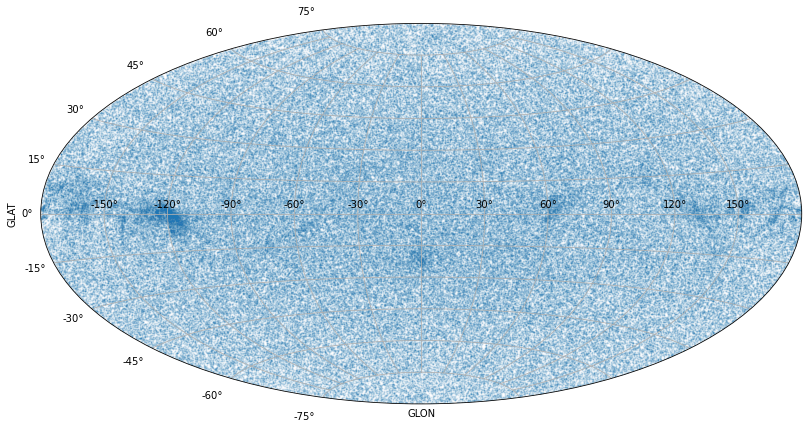

In [204]:
plt.figure(figsize=(14,7))
plt.subplot(111, projection='aitoff')
gaia_filt.viz.scatter("GLON", "GLAT", length_check=False, s=0.1, alpha=0.1)
plt.grid(True)
plt.show()

# Filtering

This is the filtering criteria
* $\varpi > 0$
* $\sigma_{\varpi}/\varpi < 0.15$
* $-3 < G_{\text{BP}} - G_{\text{RP}} < 6$
* $3 < G < 21$
* $F_{\text{BP}}/\sigma(F_{\text{BP}}) > 10$
* $F_{\text{RP}}/\sigma(F_{\text{RP}}) > 10$
* $\text{ruwe} < 1.4$
* $1.0+0.015(G_{\text{BP}} - G_{\text{RP}})^2 < E < 1.3+0.06*(G_{\text{BP}} - G_{\text{RP}})^2$
* $0< J < 13.5$
* $\text{ph\_qual} = \text{A\_A}$


In [205]:
gaia_filtered_dir = join(root_data_dir, "GAIA")
safe_mkdir(gaia_filtered_dir)

Creating /home2/s20321005/Thesis-Project/Data/GAIA dir in Data dir


In [207]:
combine_files = glob(join(combine_gaia_dir, "*.hdf5"))
combine_files.sort()
combine_files[:5]

['/home2/s20321005/Thesis-Project/Data/Combine/combine_gaia/gaia-000-001.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Combine/combine_gaia/gaia-001-002.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Combine/combine_gaia/gaia-002-003.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Combine/combine_gaia/gaia-003-004.hdf5',
 '/home2/s20321005/Thesis-Project/Data/Combine/combine_gaia/gaia-004-005.hdf5']

In [210]:
# for every files, filter them
for file in combine_files[1:]:
  gaia = vaex.open(file)
  gaia_clean = (gaia.filter("parallax > 0")
                    .filter("e_parallax/parallax < 0.15")
                    .filter("bpmag - rpmag > -3")
                    .filter("bpmag - rpmag < 6")
                    .filter("gmag > 3")
                    .filter("gmag < 21")
                    .filter("fb_over_err > 10")
                    .filter("fr_over_err > 10")
                    .filter("ruwe < 1.4")
                    .filter("1.0+0.015*(bpmag - rpmag)**2 < excess_factor")
                    .filter("1.3+0.06*(bpmag - rpmag)**2 > excess_factor")
                    .filter("Jmag < 13.5")
                    .filter("Jmag > 0")
               )
  ph_qual_filter = gaia_clean['ph_qual'].str.contains('^A.+A$')
  gaia_clean = gaia_clean[ph_qual_filter]
  gaia_clean = gaia_clean.extract()
  name = file.split("/")[-1]
  print(f"{name}, clean: {len(gaia_clean)}, raw: {len(gaia)}, {np.round(len(gaia_clean)/len(gaia)*100,2)}%")
  # break
  if (len(gaia_clean)) == 0:
    print(f"RUSAK: {name}")
  else:
    gaia_clean.export(join(gaia_filtered_dir, name), progress=True)

gaia-001-002.hdf5, clean: 41823, raw: 479924, 8.71%
export(hdf5) [########################################] 100.00% elapsed time  :     1.79s =  0.0m =  0.0h
 gaia-002-003.hdf5, clean: 40518, raw: 483405, 8.38%
export(hdf5) [########################################] 100.00% elapsed time  :     1.61s =  0.0m =  0.0h
 gaia-003-004.hdf5, clean: 40112, raw: 481163, 8.34%
export(hdf5) [########################################] 100.00% elapsed time  :     1.68s =  0.0m =  0.0h
 gaia-004-005.hdf5, clean: 39915, raw: 474070, 8.42%
export(hdf5) [########################################] 100.00% elapsed time  :     1.59s =  0.0m =  0.0h
 gaia-005-006.hdf5, clean: 40492, raw: 472784, 8.56%
export(hdf5) [########################################] 100.00% elapsed time  :     1.77s =  0.0m =  0.0h
 gaia-006-007.hdf5, clean: 40513, raw: 478456, 8.47%
export(hdf5) [########################################] 100.00% elapsed time  :     1.66s =  0.0m =  0.0h
 gaia-007-008.hdf5, clean: 39680, raw: 475733, 

In [211]:
filtered = vaex.open_many(glob(join(gaia_filtered_dir, "*.hdf5")))
filtered

#,ra,dec,Jmag,Kmag,ph_qual,source_id,pm,pmra,e_pmra,pmdec,e_pmdec,parallax,e_parallax,gmag,bpmag,rpmag,fb_over_err,fr_over_err,ruwe,excess_factor,rv_gaia,e_rv_gaia,GLON,GLAT,teff_gspphot,teff_gspphot_lower,teff_gspphot_upper,logg_gspphot,logg_gspphot_lower,logg_gspphot_upper,mh_gspphot,mh_gspphot_lower,mh_gspphot_upper,distance_gspphot,distance_gspphot_lower,distance_gspphot_upper,ag_gspphot,ag_gspphot_lower,ag_gspphot_upper,mh_gspspec,mh_gspspec_lower,mh_gspspec_upper,alphafe_gspspec,alphafe_gspspec_lower,alphafe_gspspec_upper,fem_gspspec,fem_gspspec_lower,fem_gspspec_upper,spectraltype_esphs,rv_rave,e_rv_rave,teff_rave,logg_rave,mh_rave,alphafe_rave,teff_galah,e_teff_galah,logg_galah,e_logg_galah,feh_galah,e_feh_galah,alphafe_galah,e_alphafe_galah,rv_galah,e_rv_galah,subclass_lamost,teff_lamost,e_teff_lamost,logg_lamost,e_logg_lamost,feh_lamost,e_feh_lamost,rv_lamost,e_rv_lamost,alpham_lamost,e_alpham_lamost,rv_apogee,e_rv_apogee,teff_apogee,e_teff_apogee,logg_apogee,e_logg_apogee,mh_apogee,e_mh_apogee,alpham_apogee,e_alpham_apogee,feh_apogee,e_feh_apogee
0,219.15519,-89.531815,11.418,10.704,AAA,5764635393079767296,11.202992,-8.352078761712255,0.012033119,-7.466580849038771,0.012214055,0.43047135125671315,0.011004682,13.174702,13.789571,12.425439,1228.2557,2930.1003,0.99114627,1.250944,67.09427,0.9067575,303.1640199013711,-26.708320393143175,4718.7,4713.292,4724.818,2.5833,2.5655,2.6014,-0.1946,-0.1952,-0.1941,2070.6995,2031.6134,2112.0928,0.3619,0.3574,0.3668,nan,nan,nan,nan,nan,nan,nan,nan,nan,K,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
1,219.158806,-89.413895,11.663,11.294,AAA,5764640100363957504,17.092428,-15.001155516411039,0.012871818,-8.19246106070145,0.015000838,1.1756548246142724,0.013411725,12.782229,13.126454,12.259919,2108.8503,2770.0098,1.1272085,1.2091599,-44.15717,4.249649,303.2222502636439,-26.60253359940945,5956.387,5928.9277,5977.1416,3.7695,3.7597,3.7775,-0.5645,-0.585,-0.5521,867.1803,861.9395,874.5553,0.2911,0.2763,0.3022,nan,nan,nan,nan,nan,nan,nan,nan,nan,F,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
2,219.247148,-89.488724,13.026,12.512,AAA,5764638554175708672,11.671728,-10.811040433849826,0.017244274,-4.3989353543881675,0.01951931,1.9674662903618854,0.01660323,14.446186,14.915824,13.815229,914.79407,1357.1978,0.9770324,1.2232119,13.169717,3.8980281,303.1861500960215,-26.669990195169934,5226.577,5217.9365,5235.52,4.5456,4.5418,4.5518,-0.1967,-0.2063,-0.1864,490.8246,487.5747,493.967,0.2623,0.2565,0.2679,nan,nan,nan,nan,nan,nan,nan,nan,nan,K,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
3,219.781174,-89.569244,9.953,9.683,AAA,5764635079544432128,7.510926,1.5220681400491376,0.021005264,-7.355087608746858,0.020949371,2.877481398679552,0.018422326,10.847249,11.118501,10.412085,2177.0447,4133.433,1.3881594,1.1933558,-5.286206,0.73470575,303.150290423574,-26.744015581943707,6141.639,6130.1123,6152.07,4.043,4.0398,4.0469,-0.4365,-0.4457,-0.4269,344.0585,341.9788,346.0511,0.0799,0.0745,0.0847,-0.26,-0.32,-0.22,0.33,0.26,0.4,nan,nan,nan,F,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,--,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,219.801943,-89.006889,12.509,11.912,AAA,5764731359829174400,11.346082,-10.54234747031648,0.016789988,-4.1943390093826975,0.015902767,0.2086716186891874,0.014617706,14.17896,14.733065,13.476229,735.02185,2048.8267,1.051371,1.2394285,42.34929,3.1309774,303.43352796578637,-26.242058683093564,5244.1147,5202.4478,5301.4165,3.1862,3.0736,3.2597,-0.1073,-0.1138,-0.1047,2680.891,2446.6587,3078.62,0.5634,0.538,0.5992,nan,nan,nan,nan,nan,nan,nan,nan,nan,K,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,na

# Cut 2MASS also

In [212]:
tmass_filtered_dir = join(root_data_dir, "TMASS")
safe_mkdir(tmass_filtered_dir)

Creating /home2/s20321005/Thesis-Project/Data/TMASS dir in Data dir


This is the filtering criteria is a bit shorter
* $0< J < 13.5$
* $\text{ph\_qual} = \text{A\_A}$


In [213]:
# load 2MASS
twomass_files = glob(join(root_data_dir, 'TWOMASS-old', '*hdf5'))
twomass_files.sort()
twomass_files[:5], len(twomass_files)

(['/home2/s20321005/Thesis-Project/Data/TWOMASS-old/tmass-000-001.hdf5',
  '/home2/s20321005/Thesis-Project/Data/TWOMASS-old/tmass-001-002.hdf5',
  '/home2/s20321005/Thesis-Project/Data/TWOMASS-old/tmass-002-003.hdf5',
  '/home2/s20321005/Thesis-Project/Data/TWOMASS-old/tmass-003-004.hdf5',
  '/home2/s20321005/Thesis-Project/Data/TWOMASS-old/tmass-004-005.hdf5'],
 360)

In [215]:
# for every files, filter them
for file in twomass_files:
  tmass = vaex.open(file)
  tmass_clean = tmass.filter("Jmag < 13.5").filter("Jmag > 0")
  ph_qual_filter = tmass_clean['ph_qual'].str.contains('^A.+A$')
  tmass_clean = tmass_clean[ph_qual_filter]
  tmass_clean = tmass_clean.extract()
  name = file.split("/")[-1]
  print(f"{name}, clean: {len(tmass_clean)}, raw: {len(tmass)}, {np.round(len(tmass_clean)/len(tmass)*100,2)}%")
#   break
  if (len(tmass_clean)) == 0:
    print(f"RUSAK: {name}")
  else:
    tmass_clean.export(join(tmass_filtered_dir, name), progress=True)

tmass-000-001.hdf5, clean: 53889, raw: 505425, 10.66%
export(hdf5) [########################################] 100.00% elapsed time  :     0.31s =  0.0m =  0.0h
 tmass-001-002.hdf5, clean: 53157, raw: 492475, 10.79%
export(hdf5) [########################################] 100.00% elapsed time  :     0.23s =  0.0m =  0.0h
 tmass-002-003.hdf5, clean: 51646, raw: 496622, 10.4%
export(hdf5) [########################################] 100.00% elapsed time  :     0.31s =  0.0m =  0.0h
 tmass-003-004.hdf5, clean: 50988, raw: 494551, 10.31%
export(hdf5) [########################################] 100.00% elapsed time  :     0.30s =  0.0m =  0.0h
 tmass-004-005.hdf5, clean: 50950, raw: 486675, 10.47%
export(hdf5) [########################################] 100.00% elapsed time  :     0.28s =  0.0m =  0.0h
 tmass-005-006.hdf5, clean: 51849, raw: 484417, 10.7%
export(hdf5) [########################################] 100.00% elapsed time  :     0.27s =  0.0m =  0.0h
 tmass-006-007.hdf5, clean: 51906, ra

In [216]:
filtered = vaex.open_many(glob(join(tmass_filtered_dir, "*.hdf5")))
filtered

#,ra,dec,Jmag,Kmag,designation,ph_qual
0,323.128869,-89.549393,9.861,9.113,21323092-8932578,AAA
1,323.36232,-89.218887,11.351,10.968,21332695-8913079,AAA
2,323.693003,-89.673004,10.959,10.535,21344632-8940228,AAA
3,323.084887,-88.639961,10.928,10.668,21322037-8838238,AAA
4,323.099121,-88.401466,13.356,13.027,21322378-8824052,AAA
...,...,...,...,...,...,...
"50,234,298",56.682946,88.188225,13.155,12.568,03464390+8811176,AAA
"50,234,299",56.730961,88.800148,13.222,12.311,03465543+8848005,AAA
"50,234,300",56.743266,88.328026,12.955,12.525,03465838+8819408,AAA
"50,234,301",56.574611,89.685837,12.777,12.244,03461790+8941090,AAA
